In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
pd.set_option('max_colwidth', 400)

In [2]:
# Read the data into a Pandas DataFrame
chronic_disease_df = pd.read_csv('Resources/U.S._Chronic_Disease_Indicators 2.csv')
chronic_disease_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD 12.00,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN


In [3]:
chronic_disease_df.info

<bound method DataFrame.info of         YearStart  YearEnd LocationAbbr    LocationDesc DataSource  \
0            2019     2019           AR        Arkansas      BRFSS   
1            2019     2019           ID           Idaho      BRFSS   
2            2019     2019           IN         Indiana      YRBSS   
3            2019     2019           IA            Iowa       NVSS   
4            2019     2019           IA            Iowa      BRFSS   
...           ...      ...          ...             ...        ...   
309210       2022     2022           VI  Virgin Islands      BRFSS   
309211       2022     2022           WV   West Virginia      BRFSS   
309212       2022     2022           WI       Wisconsin      BRFSS   
309213       2022     2022           VT         Vermont      BRFSS   
309214       2022     2022           WA      Washington      BRFSS   

                                        Topic  \
0                                    Diabetes   
1                            

In [4]:
chronic_disease_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [5]:
chronic_disease_df.rename(columns={
    'YearStart': 'year_started',
    'YearEnd': 'year_ended',
    'LocationAbbr': 'state_abbr',
    'LocationDesc': 'state'}, inplace=True)

chronic_disease_df

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD 12.00,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309210,2022,2022,VI,Virgin Islands,BRFSS,Tobacco,Quit attempts in the past year among adult current smokers,NaN,%,Age-adjusted Prevalence,...,TOB,TOB06,NaN,AGEADJPREV,RACE,AIAN,NaN,NaN,NaN,NaN
309211,2022,2022,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease among adults,NaN,%,Crude Prevalence,...,COPD,COPD01,NaN,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
309212,2022,2022,WI,Wisconsin,BRFSS,Immunization,Pneumococcal vaccination among adults aged 65 years and older,NaN,%,Crude Prevalence,...,IMM,IMM04,NaN,CRDPREV,RACE,BLK,NaN,NaN,NaN,NaN
309213,2022,2022,VT,Vermont,BRFSS,Social Determinants of Health,Lack of health insurance among adults aged 18-64 years,NaN,%,Crude Prevalence,...,SDOH,SDH09,NaN,CRDPREV,RACE,HAPI,NaN,NaN,NaN,NaN


In [6]:
datasources = chronic_disease_df['DataSource'].unique()
print(datasources)

['BRFSS' 'YRBSS' 'NVSS' 'US Cancer DVT' 'NSCH' 'CMS Part A Claims Data'
 'ACS' 'PRAMS' 'USRDS' 'AEDS' 'NIS' 'ANRF'
 'Current Population Survey - FSS'
 'WIC Participant and Program Characteristics']


In [7]:
chronic_disease_df.columns

Index(['year_started', 'year_ended', 'state_abbr', 'state', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [8]:
heatmap_df = chronic_disease_df[[
    'year_started', 
    'year_ended', 
    'state_abbr', 
    'state', 
    'DataSource',
    'Topic'
]]

heatmap_df

,year_started,year_ended,state_abbr,state,DataSource,Topic
0,2019,2019,AR,Arkansas,BRFSS,Diabetes
1,2019,2019,ID,Idaho,BRFSS,Diabetes
2,2019,2019,IN,Indiana,YRBSS,Sleep
3,2019,2019,IA,Iowa,NVSS,Asthma
4,2019,2019,IA,Iowa,BRFSS,Asthma
...,...,...,...,...,...,...
309210,2022,2022,VI,Virgin Islands,BRFSS,Tobacco
309211,2022,2022,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease
309212,2022,2022,WI,Wisconsin,BRFSS,Immunization
309213,2022,2022,VT,Vermont,BRFSS,Social Determinants of Health


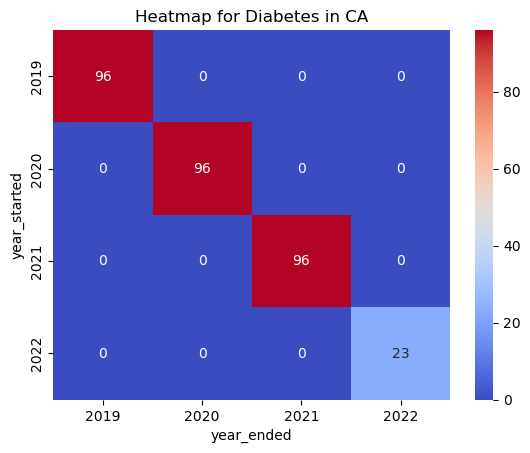

In [10]:
# Create a heatmap for a specific Topic and State
selected_topic = 'Diabetes'
selected_state = 'CA'
filtered_df = heatmap_df[(heatmap_df['Topic'] == selected_topic) & (heatmap_df['state_abbr'] == selected_state)]

plt.clf()  # Clear the current figure
if not filtered_df.empty:
    heatmap_data = filtered_df.pivot_table(index='year_started', columns='year_ended', values='DataSource', aggfunc='count', fill_value=0)
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
    plt.title(f'Heatmap for {selected_topic} in {selected_state}')
else:
    plt.text(0.5, 0.5, 'No data available for the selected Topic and State', horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')

plt.show()

In [9]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_click(b):
    print("Button clicked!")

button.on_click(on_button_click)

Button(description='Click Me!', style=ButtonStyle())

In [71]:
# Create dropdowns for Topics and State Abbreviations
topic_dropdown = widgets.Dropdown(
    options=heatmap_df['Topic'].unique(),
    description='Select Topic:',
)

state_dropdown = widgets.Dropdown(
    options=heatmap_df['state_abbr'].unique(),
    description='Select State:',
)

# Function to update the heatmap
def update_heatmap(selected_topic, selected_state):
    filtered_df = heatmap_df[(heatmap_df['Topic'] == selected_topic) & (heatmap_df['state_abbr'] == selected_state)]
    
    plt.clf()  # Clear the current figure
    if not filtered_df.empty:
        heatmap_data = filtered_df.pivot_table(index='year_started', columns='year_ended', values='DataSource', aggfunc='count', fill_value=0)
        sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
        plt.title(f'Heatmap for {selected_topic} in {selected_state}')
    else:
        plt.text(0.5, 0.5, 'No data available for the selected Topic and State', horizontalalignment='center', verticalalignment='center', fontsize=12)
        plt.axis('off')
    
    plt.show()

# Link the dropdowns to the update function
widgets.interactive(update_heatmap, selected_topic=topic_dropdown, selected_state=state_dropdown)

interactive(children=(Dropdown(description='Select Topic:', options=('Diabetes', 'Sleep', 'Asthma', 'Health St…

In [70]:
# Create a dropdown menu for Topics
topic_dropdown = widgets.Dropdown(
    options=heatmap_df['Topic'].unique(),
    description='Select Topic:',
)

# Create a dropdown menu for state abbreviations
state_dropdown = widgets.Dropdown(
    options=heatmap_df['state_abbr'].unique(),
    description='Select State:',
)

# Function to update the heatmap based on the selected topic and state abbreviation
def update_heatmap(selected_topic, selected_state):
    filtered_df = heatmap_df[(heatmap_df['Topic'] == selected_topic) & (heatmap_df['state_abbr'] == selected_state)]
    
    # Create a heatmap (you may need to adjust the data for a proper heatmap)
    if not filtered_df.empty:
        heatmap_data = filtered_df.pivot_table(index='year_started', columns='year_ended', values='DataSource', aggfunc='count', fill_value=0)
        sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
        plt.title(f'Heatmap for {selected_topic} in {selected_state}')
        plt.show()
    else:
        plt.clf()
        plt.text(0.5, 0.5, 'No data available for the selected Topic and State', horizontalalignment='center', verticalalignment='center', fontsize=12)
        plt.axis('off')
        plt.show()

# Link the dropdowns to the update function
widgets.interactive(update_heatmap, selected_topic=topic_dropdown, selected_state=state_dropdown)

interactive(children=(Dropdown(description='Select Topic:', options=('Diabetes', 'Sleep', 'Asthma', 'Health St…

In [69]:
state_abbr_dropdown = sns.load_dataset('state_abbr')
topic_dropdown = sns.load_dataset("Topic")

ValueError: '['state_abbr']' is not one of the example datasets.

In [66]:
options = [heatmap_df['state_abbr']]
options.head(5)

AttributeError: 'list' object has no attribute 'head'

In [53]:
sns.heatmap(heatmap_df, annot=True)
plt.title('Tester')

ValueError: could not convert string to float: 'AR'